# Data Scientist Associate Practical Exam Submission

## Import Libraries

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Task 1 

The dataset contain the information of mopeds collected by the product team

There are **1500 rows** and **8 columns** in the data. Here's the information

- **owned** : Whether the reviewer owns the moped (1) or not (0),match with instruction
- **make_model** : The make and model of the bike, one of six possible values,match with instruction
- **review_month** : The month the review was given in English short format (Jan,Feb, Mar, Apr etc.). I only keep the month and remove all the day format
- **web_browser** : Web browser used by the user leaving the review,there were 150 null values which i replace with 'unknown' as per instruction
- **reviewer_age** : Age of the user leaving the review. I replace the invalid value with the mean of the age
- **primary_use**  : The main reason the user reports that they use the bike for, there's only 2 values, match with the instruction
- **value_for_money** : Rating given by the user on value for money of the bike. I only keep the single rating for the value
- **overall_rating**  : Total rating score after combining multiple rating scores, match with the instruction

There were only 1 columns that has null values, and after validation, the dataset contain **1500 rows** and **8 columns**

In [62]:
df = pd.read_csv("electric_bike_ratings_2212.csv")
df.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


### Explore Categorical Variable

In [64]:
dfObject = df.select_dtypes(include=['object']) #Take only object data type columns

for i in dfObject:
    print(f'{i} : {dfObject[i].nunique()}') #Print the sum of the unique value in the columns

make_model : 6
review_month : 332
web_browser : 6
reviewer_age : 36
primary_use : 2
value_for_money : 10


#### Fix review_month column
- Let's only leave the months and remove the days value from the column

In [65]:
df['review_month'] = df['review_month'].str[-3:] #Extract only the letter after the first 3 letters
df['review_month'].value_counts()

Sep    141
Mar    141
May    138
Nov    126
Jan    126
Oct    125
Jun    124
Apr    123
Dec    117
Feb    115
Aug    114
Jul    110
Name: review_month, dtype: int64

#### Fix reviewer_age column
- There were '-' in the reviewer_age column, let's replace it with the average age
- Convert into integer data types

In [66]:
df['reviewer_age'].value_counts().head()

-     105
19     52
41     51
45     50
18     46
Name: reviewer_age, dtype: int64

In [67]:
df[df['reviewer_age'] == '-'].head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
31,1,Hoang-Keetra,Jul,Chrome,-,Commuting,5/10,17.27
52,1,Nielah-Eyden,Jun,Chrome,-,Commuting,7/10,18.51
53,1,Nielah-Eyden,Feb,Chrome,-,Commuting,4/10,19.18
56,0,Lunna-Eyden,Feb,Firefox,-,Commuting,4/10,15.13
71,1,Lunna-Eyden,Sep,Firefox,-,Commuting,6/10,15.83


In [68]:
df_age_mean = int(df.loc[df['reviewer_age'] != '-','reviewer_age'].astype(int).mean()) #Take the mean of only valid value
print(f'Reviewer age mean : {df_age_mean}')

df['reviewer_age'] =  df['reviewer_age'].replace('-',df_age_mean)  #Here, we are replacing '-' with 32
df['reviewer_age'] = df['reviewer_age'].astype('int64') #Convert the data type into integer
df['reviewer_age'].value_counts().head()

Reviewer age mean : 32


32    135
19     52
41     51
45     50
18     46
Name: reviewer_age, dtype: int64

#### Fix value_for_money column
- Remove the '/10' from the column and just leave the rating
- Convert into integer data type

In [69]:
df['value_for_money'].value_counts()

5/10     387
6/10     323
4/10     315
3/10     183
7/10     167
2/10      53
8/10      52
1/10      11
9/10       8
10/10      1
Name: value_for_money, dtype: int64

In [70]:
df['value_for_money'] = df['value_for_money'].str[0].astype('int') #Extract only the first letter and convert it into integer
df['value_for_money'].value_counts()

5    387
6    323
4    315
3    183
7    167
2     53
8     52
1     12
9      8
Name: value_for_money, dtype: int64

### Explore numerical variable

In [71]:
df.describe()

,owned,reviewer_age,value_for_money,overall_rating
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.593333,32.556000,4.971333,17.138907
std,0.491375,9.876769,1.484132,2.445566
min,0.000000,16.000000,1.000000,11.690000
25%,0.000000,24.000000,4.000000,15.320000
50%,1.000000,32.000000,5.000000,18.240000
75%,1.000000,41.000000,6.000000,18.840000
max,1.000000,50.000000,9.000000,22.760000


### Handle Null Value
- Only **web_browser column** that has **null** value in it
- As per instruction, we replace the null with **'unknown'**

In [72]:
df.isna().sum()

owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64

In [73]:
df['web_browser'] = df['web_browser'].fillna('unknown') #Replace the null with 'unknown'
df.isna().sum()

owned              0
make_model         0
review_month       0
web_browser        0
reviewer_age       0
primary_use        0
value_for_money    0
overall_rating     0
dtype: int64

### Final Result

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   int64  
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   int64  
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


## Task 2

From the figure, reviewer that has moped has higher count than the one that does not. So the data is unbalanced accros the owned types

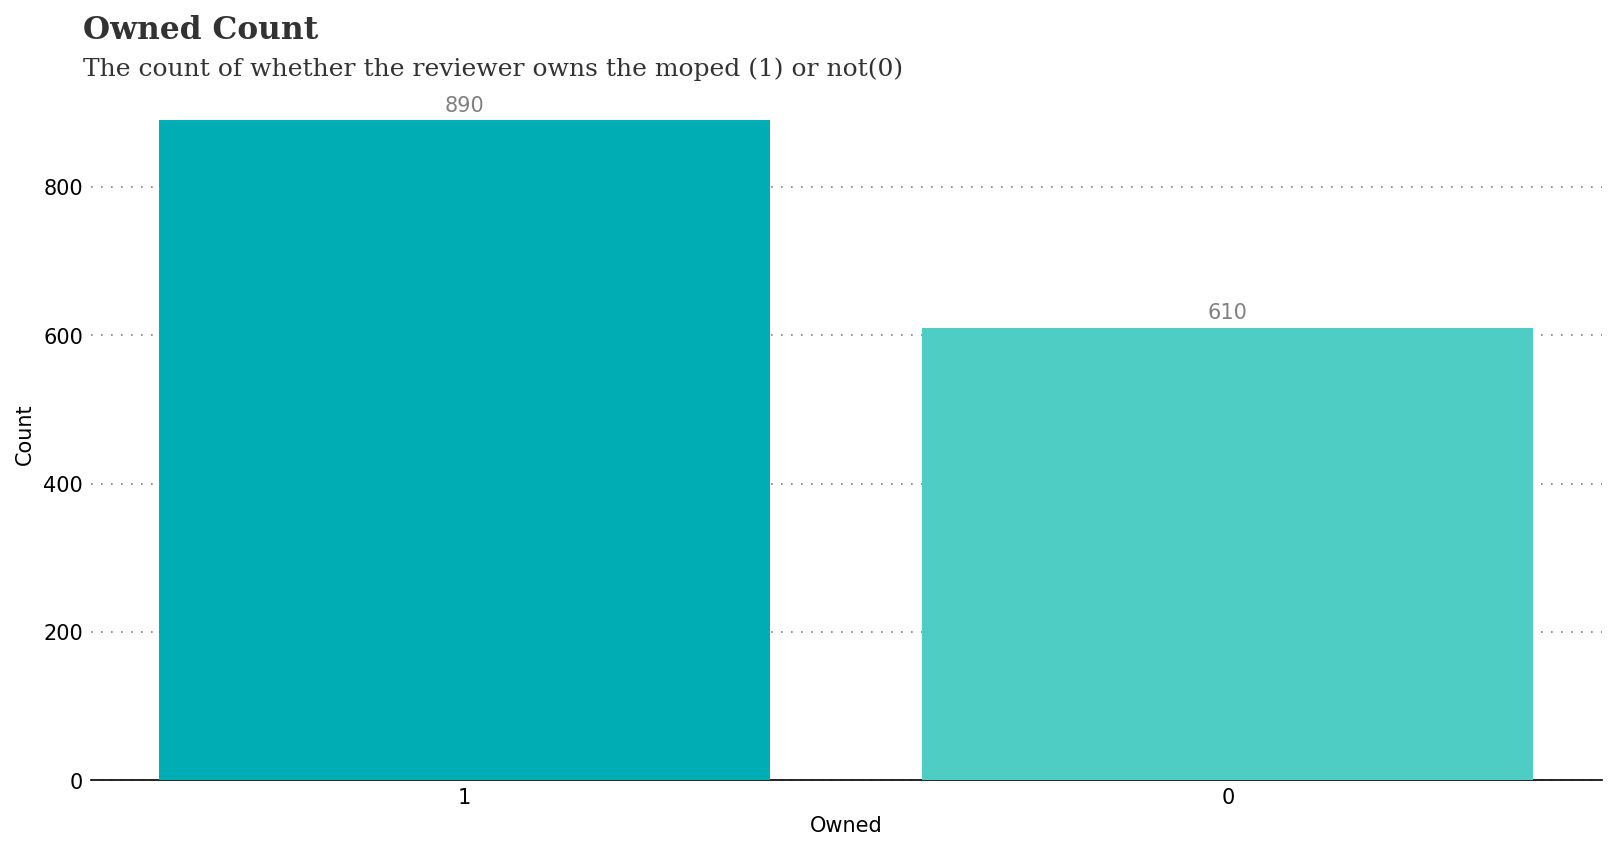

In [75]:
dfowned = df['owned'].value_counts()

fig, ax = plt.subplots(figsize=(13, 6), dpi=150)

x = np.arange(1, len(dfowned)+1)
ax.grid(color='gray', linestyle=':', zorder=0, axis='y',  dashes=(1, 5))
ax.bar(x, height=dfowned, zorder=3,color = ['#00ADB5','#4ECDC4'])
ax.set_xticks(x)
ax.set_xticklabels(dfowned.index)

ax.set_ylabel('Count')
ax.set_xlabel('Owned')

ax.text(0.5, 1000, 'Owned Count', fontsize=15,
        fontweight='bold', fontfamily='serif', color="#323232")
ax.text(0.5, 950, 'The count of whether the reviewer owns the moped (1) or not(0)', fontsize=12,
        fontweight='light', fontfamily='serif', color="#323232")

for i, j in enumerate(dfowned):
    ax.annotate(f'{j}', xy=(i+1, j+20), color='gray',
                horizontalalignment='center', verticalalignment='center', fontsize=10)
    

for spine in ["left", "top", "right"]:
    locals()["ax"].spines[spine].set_visible(False)
    locals()["ax"].tick_params(length=0)

## Task 3
The graph showed the sign of multimodal distribution,it showed by theres more than 1 peak.With the highest frequency of overall rating scatter around the range of 15-19

Actually we can lumps these ratings into multiple group according to these distribution.Example 12-13 as low rating, 14-16 as moderate rating, and 18-20 into high rating 

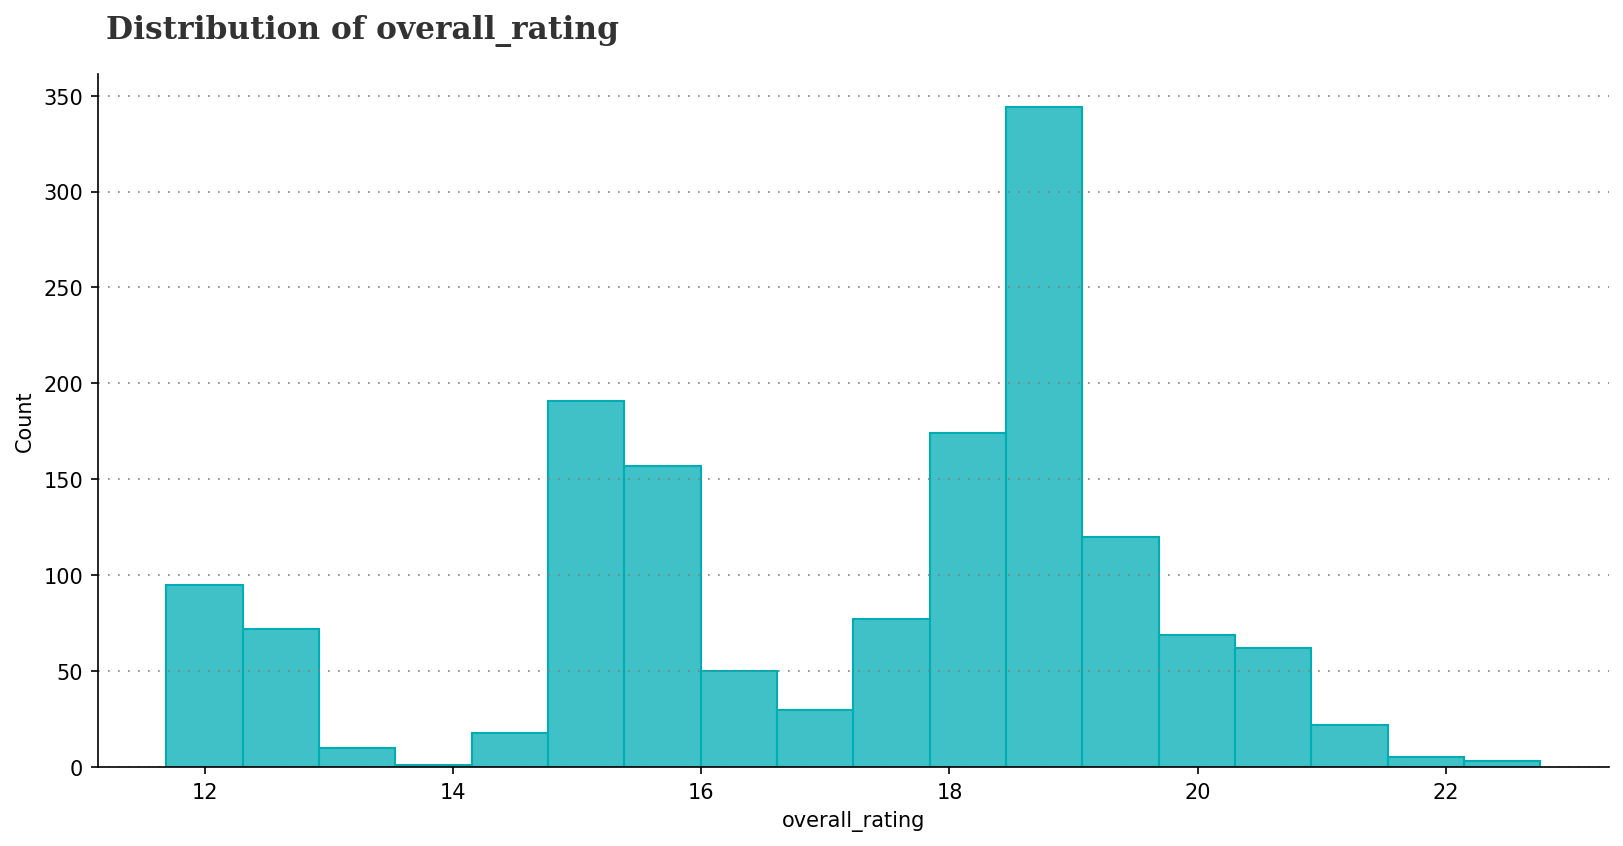

In [76]:
fig, ax = plt.subplots(figsize=(13, 6), dpi=150)

palette = ["#00ADB5", '#393E46']

ax.text(11.2, 380, 'Distribution of overall_rating', fontsize=15,
        fontweight='bold', fontfamily='serif', color="#323232")

sns.histplot(data=df, x="overall_rating",
             color=palette[0],   edgecolor=palette[0],ax=ax)
ax.grid(color='gray', linestyle=':', zorder=0, axis='y',  dashes=(1, 5))

for s in ["top", "right"]:
    locals()["ax"].spines[s].set_visible(False)



From the boxplot we conclude that 50% of the data lies around 15-19

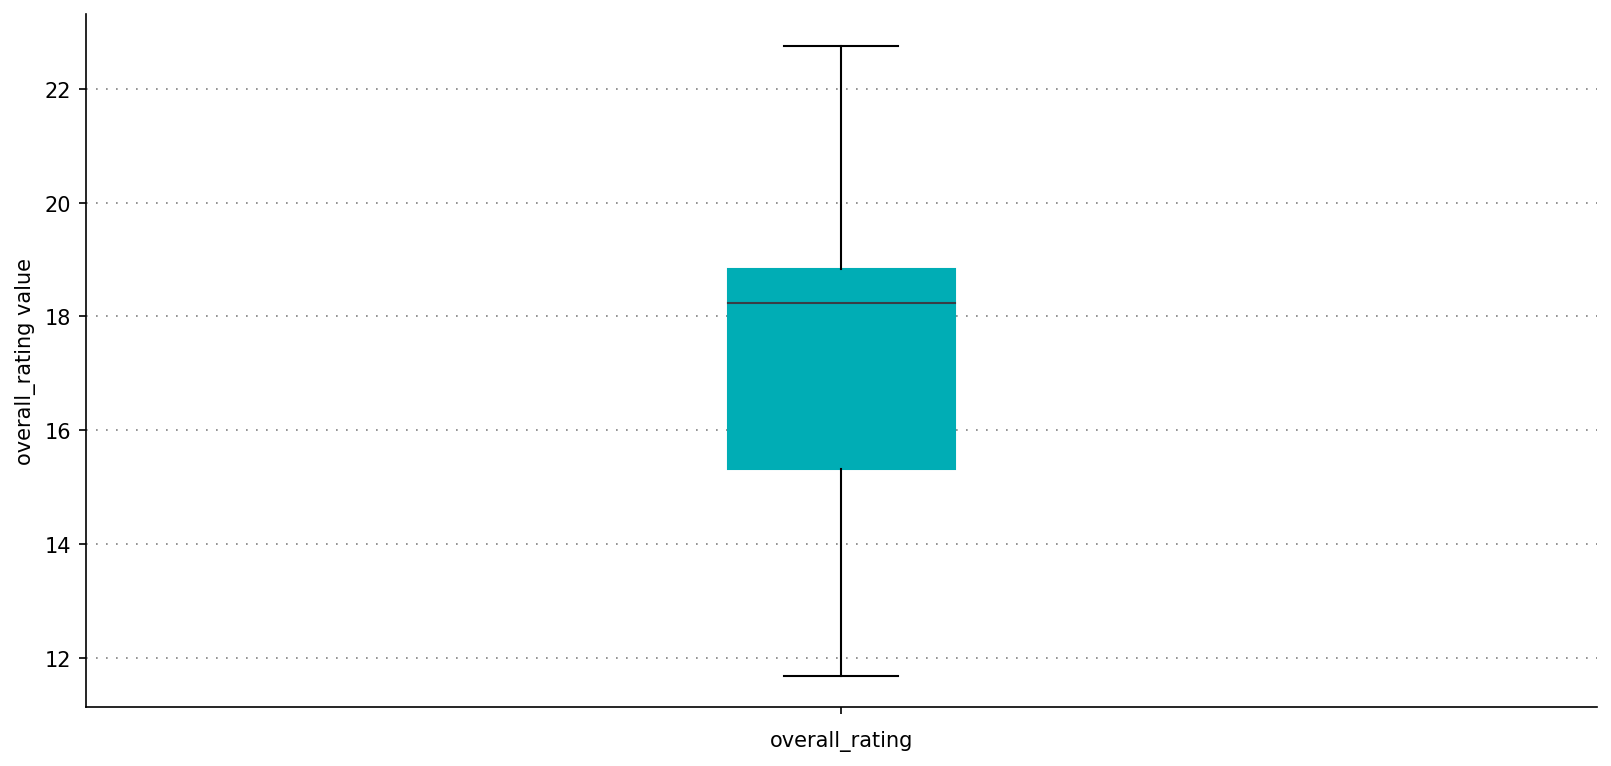

In [77]:
fig, ax = plt.subplots(figsize=(13, 6), dpi=150)

palette = ["#00ADB5", '#393E46']

ax.grid(color='gray', linestyle=':', zorder=0, axis='y',  dashes=(1, 5))
box = ax.boxplot(df['overall_rating'], patch_artist=True,
                 boxprops=dict(facecolor="#00ADB5", color="#00ADB5"),
                 flierprops=dict(markerfacecolor='w',
                                 markeredgecolor='salmon'),
                 medianprops=dict(color='#393E46'))

ax.set_xticklabels([])
ax.set_ylabel('overall_rating value')
ax.set_xlabel('overall_rating')

for s in ["top", "right"]:
    locals()["ax"].spines[s].set_visible(False)

## Task 4

The overall rating given by the owned reviewer, which ranges from 17 to 19, is higher than the one given by the unowned reviewer, which ranges from 15 to 18. Therefore, the majority of moped owners are happy with their vehicle's features.


There are a few low outliers from the owned reviewers, which may happen as a result of their dissatisfaction with the moped feature.

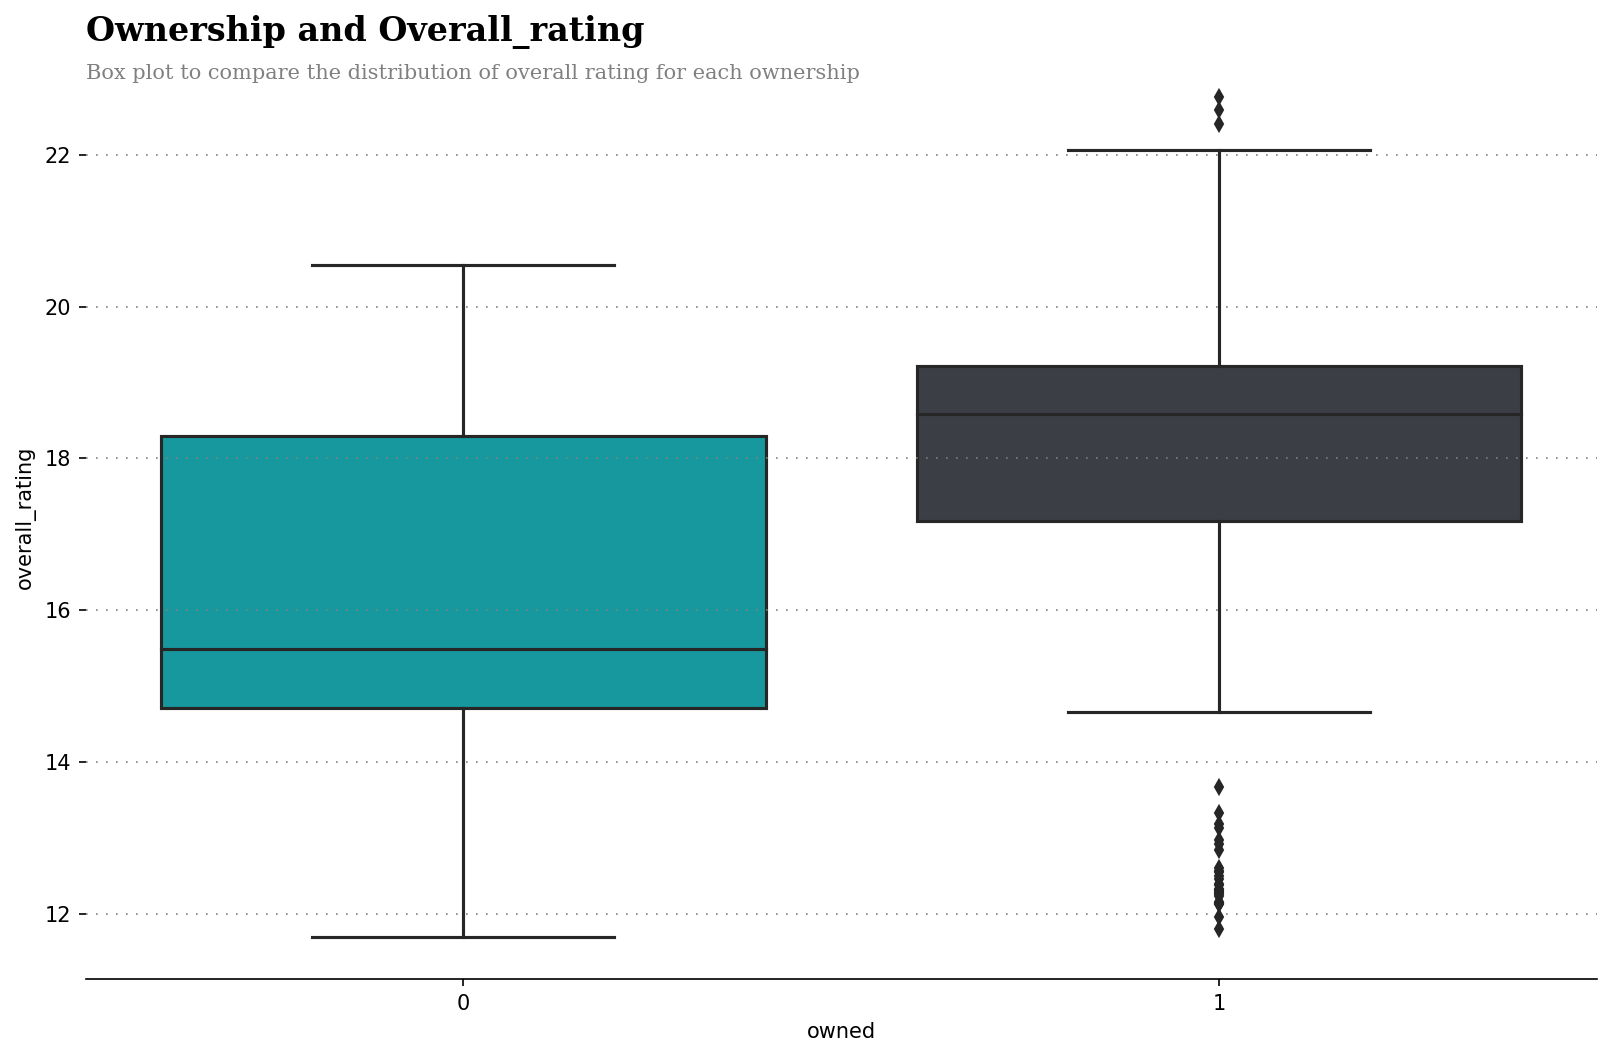

In [78]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=150)

palette = ["#00ADB5", '#393E46']

ax.text(-0.5, 23.5, 'Ownership and Overall_rating',
        fontfamily='serif', fontsize=16, fontweight='bold')
ax.text(-0.5, 23, 'Box plot to compare the distribution of overall rating for each ownership',
        fontfamily='serif', fontsize=10, fontweight='light',color='grey')

ax.grid(color='gray', linestyle=':', zorder=0, axis='y',dashes=(1, 5))
sns.boxplot(data=df,x='owned',y='overall_rating',palette=palette)

for spine in ["left", "top", "right"]:
    locals()["ax"].spines[spine].set_visible(False)

## Task 5

We want to predict whether the ratings were from owners or non-owners. Thus, the target will only have two possible values: owners(1) or non-onwers(0). This leads us to the conclusion that this is a **Binary Classification** problem.

### Preapare Data
Here's what we are have to do:
- Balance the data
- Encoding
- Standarize data
- Split the data

#### Balancing Data
The previous graph shows that there is an uneven distribution of ownership across the label.This needs to be fixed in order for the model to generalize to each label.There are two things we can do: (1) Don't utilize accuracy as one of our metrics or (2) Undersampling. This time we will do undersampling

In [79]:
# Perform Equal counts stratified sampling
data_sample = df.groupby('owned')\
	.sample(n=610, random_state=2022)      

data_sample['owned'].value_counts()

0    610
1    610
Name: owned, dtype: int64

In [80]:
#Separate the target and the feature
X = data_sample.drop('owned',axis=1) #Feature
y = data_sample['owned'] #Target

#### Encoding

In [81]:
X = pd.get_dummies(X) #Perform one hot encoding and append it into a new columns

#### Standarize Data
We standardize data in order to give equal importance to all features and to avoid the dominance of one feature over the other. 

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

#### Split Data
We split the data into training and testing sets in machine learning to evaluate how well our model can generalize to new, unseen data.

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

## Task 6
Fit Baseline model

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# create logistic regression object
lr = LogisticRegression()

# fit the model to the training data
lr.fit(X_train, y_train)

# make predictions on the test data
y_pred = lr.predict(X_test)

## Task 7
Comparasion Model

In [85]:
from sklearn import svm

# create SVM classifier with linear kernel
clf = svm.SVC(kernel='linear')

# train the classifier on the training data
clf.fit(X_train, y_train)

# make predictions on the testing data
y_pred_SVM = clf.predict(X_test)

## Task 8
We are using Logistic regression because Logistic regression is a linear model, which makes it computationally efficient and easy to interpret. It also allows for easy updating of the model with new data. Additionally, logistic regression can handle imbalanced datasets and is relatively robust to noise in the data.

Also im choosing SVM because SVM is a powerful and flexible machine learning algorithm that can handle a variety of input data types and can work well with both linear and nonlinear data.

## Task 9
Im using accuracy as our metrics because the data is balance across the label in the target. Also accuracy is easy to interpret

### Logistic Regression

In [86]:
# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Logistic Regression: {round(accuracy * 100,2)} %')

Accuracy Logistic Regression: 72.13 %


### SVM

In [87]:
# calculate the accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_SVM)
print(f'Accuracy Logistic Regression: {round(accuracy_svm * 100,2)} %')

Accuracy Logistic Regression: 70.22 %


## Task 10
By looking at the accuracy at the both models, we can conclude that Logistic Regression perform better than SVM which the accuracy is higher than SVM

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam